Connected to Python 3.11.5

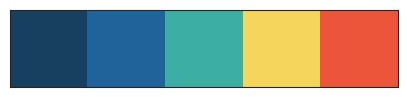

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from fredapi import Fred
sns.set_style("white")
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta
import sklearn as sk
import sklearn.preprocessing as sk_pre
from sklearn.preprocessing import StandardScaler

# Plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from scipy.optimize import minimize

### Define the colour scheme
c1 = "#173f5f"
c2 = "#20639b"
c3 = "#3caea3"
c4 = "#f6d55c"
c5 = "#ed553b"

custom_palette = [c1, c2, c3, c4, c5]
sns.palplot(sns.color_palette(custom_palette))

Tenors = ['1-Month','3-Month','1-Year','2-Year','5-Year','10-Year']
TS = [1,2]

TS_Start = '1995-01-05'
TS_End = '2024-11-01'
#  Ingest Yield Curve Data --> Source: Investor.com Historical Data downloads

Yield_Curve_DF_Master = pd.DataFrame({'Date': pd.date_range(TS_Start,TS_End, freq='D')})

for T in Tenors:

    Yield_Curve_df = pd.read_csv('United Kingdom {} Bond Yield Historical Data (1).csv'.format(T))
    Yield_Curve_df = Yield_Curve_df[['Date','Price']]
    Yield_Curve_df['Rate_{}'.format(T)] = Yield_Curve_df['Price']
    Yield_Curve_df['Date'] = pd.to_datetime(Yield_Curve_df['Date'])

    Yield_Curve_df = Yield_Curve_df.drop(['Price'], axis=1)
    Yield_Curve_DF_Master = Yield_Curve_DF_Master.merge(Yield_Curve_df, how='left', on='Date')


Yield_Curve_DF_Master.set_index(Yield_Curve_DF_Master['Date'], drop=True, inplace=True)
Yield_Curve_DF_Master = Yield_Curve_DF_Master.drop(['Date'], axis=1)
Yield_Curve_DF_Master = Yield_Curve_DF_Master.interpolate()

In [2]:
Yield_Curve_DF_Master.describe()
Yield_Curve_DF_Master.to_csv('Yieldfinal.csv')

In [3]:
def plot_rates(df):
    plot_vars = df.columns
    
    fig, ax = plt.subplots(figsize=(8,4), ncols=1, nrows=1)
    for var in plot_vars:
        ax.plot(df.index, df[var], label=var, lw=1.0)
    ax.set(title='Daily Interest Rate', xlabel='Date', ylabel='Interest Rate (%)')
    fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
    plt.show()

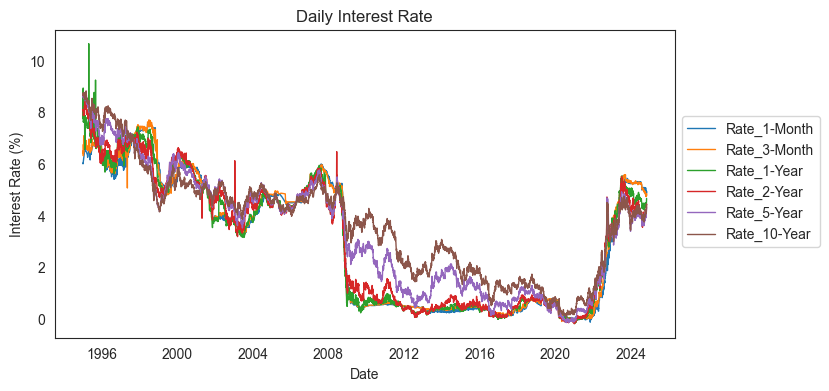

In [4]:
Yield_Curves = Yield_Curve_DF_Master.copy()
plot_rates(Yield_Curves)

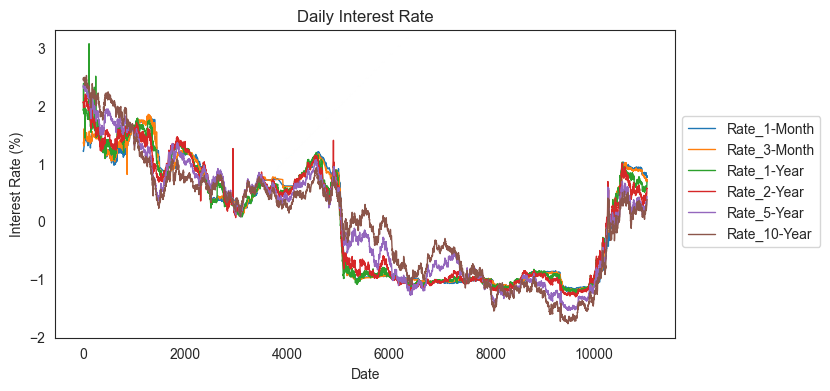

Text(0.5, 1.0, '')

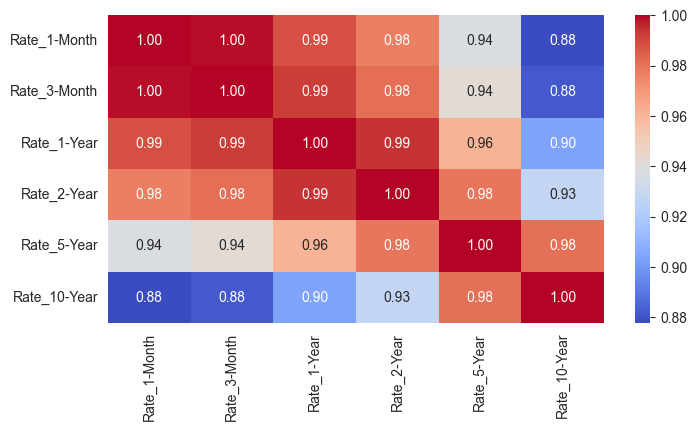

In [5]:
scaler = sk_pre.StandardScaler()
Yield_Curves_scaled = pd.DataFrame(scaler.fit_transform(np.array(Yield_Curves)))
Yield_Curves_scaled.columns = Yield_Curves.columns
Yield_Curves_scaled.to_csv('Scaled.csv')
plot_rates(Yield_Curves_scaled)

# Compute Covariance Matrix Between Yield Curves

covariance_matrix = Yield_Curves_scaled.cov()

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', ax=ax, fmt='.2f')
ax.title

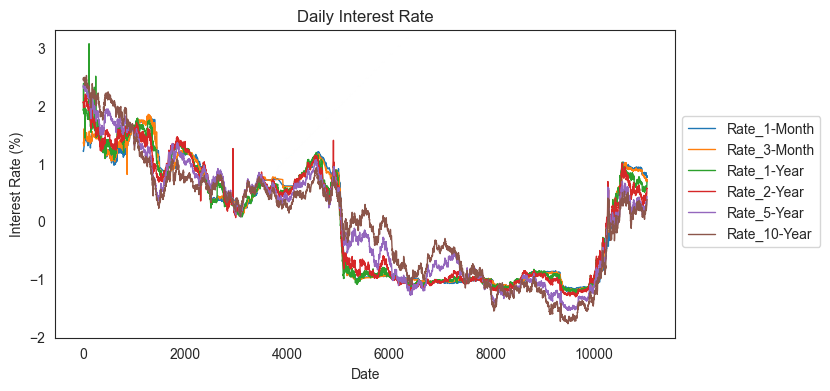

TypeError: 'Text' object is not callable

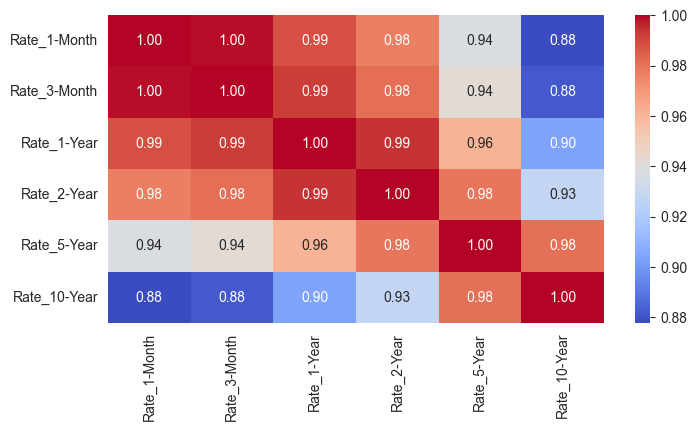

In [6]:
scaler = sk_pre.StandardScaler()
Yield_Curves_scaled = pd.DataFrame(scaler.fit_transform(np.array(Yield_Curves)))
Yield_Curves_scaled.columns = Yield_Curves.columns
Yield_Curves_scaled.to_csv('Scaled.csv')
plot_rates(Yield_Curves_scaled)

# Compute Covariance Matrix Between Yield Curves

covariance_matrix = Yield_Curves_scaled.cov()

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', ax=ax, fmt='.2f')
ax.title('Covariance Matrix (Standardised Yield Values)')

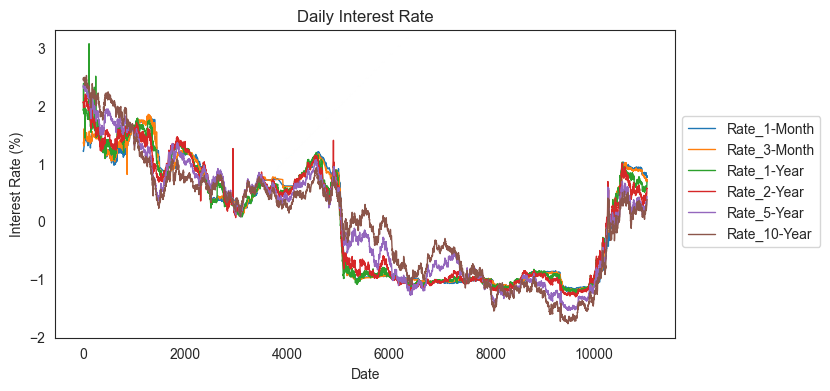

[Text(0.5, 1.0, 'Covariance Matrix (Standardised Yield Values)')]

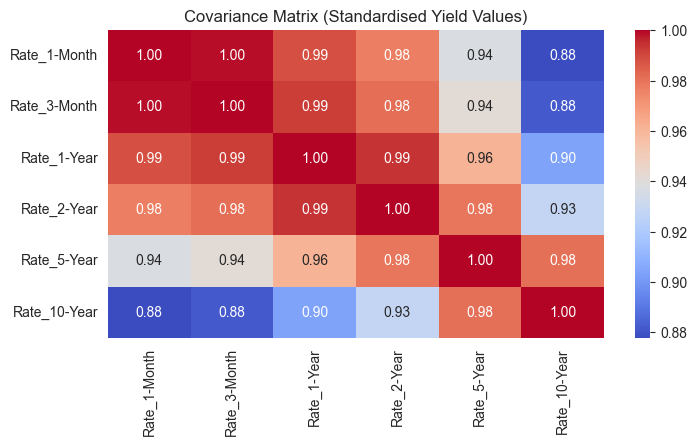

In [7]:
scaler = sk_pre.StandardScaler()
Yield_Curves_scaled = pd.DataFrame(scaler.fit_transform(np.array(Yield_Curves)))
Yield_Curves_scaled.columns = Yield_Curves.columns
Yield_Curves_scaled.to_csv('Scaled.csv')
plot_rates(Yield_Curves_scaled)

# Compute Covariance Matrix Between Yield Curves

covariance_matrix = Yield_Curves_scaled.cov()

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', ax=ax, fmt='.2f')
ax.set(title='Covariance Matrix (Standardised Yield Values)')

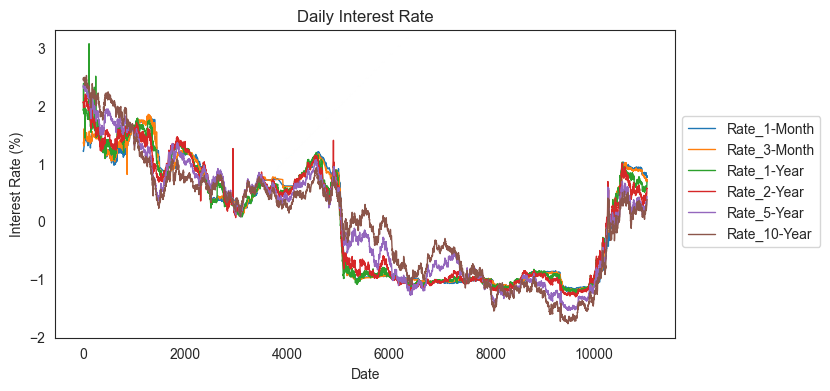

[Text(0.5, 1.0, 'Covariance Matrix (Standardized Yield Values)')]

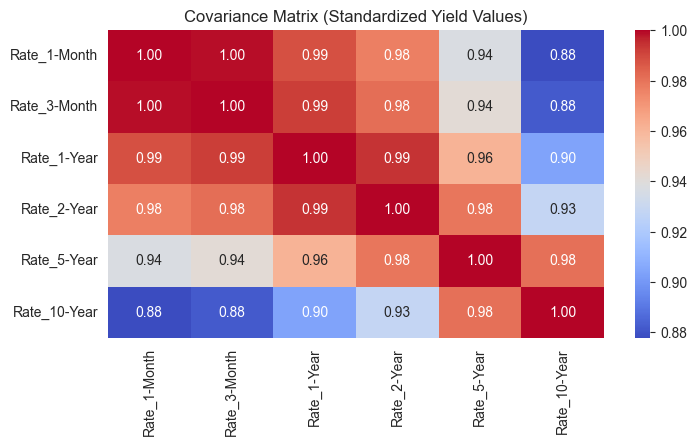

In [8]:
scaler = sk_pre.StandardScaler()
Yield_Curves_scaled = pd.DataFrame(scaler.fit_transform(np.array(Yield_Curves)))
Yield_Curves_scaled.columns = Yield_Curves.columns
Yield_Curves_scaled.to_csv('Scaled.csv')
plot_rates(Yield_Curves_scaled)

# Compute Covariance Matrix Between Yield Curves

covariance_matrix = Yield_Curves_scaled.cov()

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', ax=ax, fmt='.2f')
ax.set(title='Covariance Matrix (Standardized Yield Values)')